<a href="https://colab.research.google.com/github/mdscolour/Learning/blob/main/MLzero2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 坤和的机器学期零基础笔记2


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
print(tf.__version__)

2.9.2


## Fashion_mnist

In [2]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


5
(60000, 28, 28)


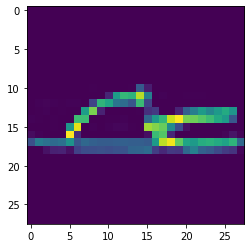

In [14]:
import matplotlib.pyplot as plt
print(training_labels[7777])
print(training_images.shape)
plt.imshow(training_images[7777])

| 标注编号 | 描述 |
| --- | --- |
| 0 | T-shirt/top（T恤）|
| 1 | Trouser（裤子）|
| 2 | Pullover（套衫）|
| 3 | Dress（裙子）|
| 4 | Coat（外套）|
| 5 | Sandal（凉鞋）|
| 6 | Shirt（汗衫）|
| 7 | Sneaker（运动鞋）|
| 8 | Bag（包）|
| 9 | Ankle boot（踝靴）|

## Normalization

In [15]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 模型与activation函数

In [110]:
model = tf.keras.models.Sequential([tf.keras.Input(shape=(28,28)),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5015 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3754 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3380 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3171 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2979 - accuracy: 0.8902


In [112]:
model.output_shape

(None, 10)

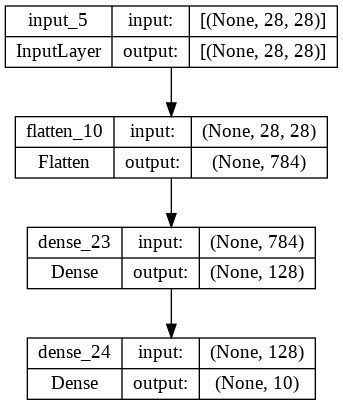

In [113]:
tf.keras.utils.plot_model(model, show_shapes=True)

## 评价

9
(10000, 28, 28)


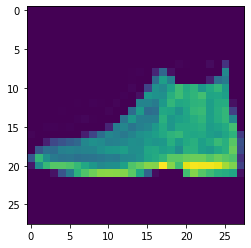

In [114]:
print(test_labels[0])
print(test_images.shape)
plt.imshow(test_images[0])

In [115]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8720


[0.35254454612731934, 0.871999979019165]

In [119]:
print(np.argmax(model.predict(test_images[9999].reshape(-1,28,28))),test_labels[9999])
classifications = model.predict(test_images[:20])
print(np.argmax(classifications,axis=1))
print(test_labels[:20])

1/1 [==============================] - 0s 30ms/step
5 5
1/1 [==============================] - 0s 47ms/step
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 2 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


#结束

（特殊状况下）增加自定义层

In [83]:
class argmax_layer(tf.keras.layers.Layer):
  def __init__(self):
    super(argmax_layer, self).__init__()

  def call(self, inputs):
    return tf.math.argmax(inputs, axis=1)
model.add(argmax_layer())
#model.pop()

In [106]:
model.pop()

In [107]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [109]:
print(model.predict(test_images[9999].reshape(-1,28,28)),test_labels[9999])
classifications = model.predict(test_images[:10])
print(classifications)
print(test_labels[:10])

1/1 [==============================] - 0s 18ms/step
[0 0 0 0 0 0 0 0 0 0] 5
1/1 [==============================] - 0s 17ms/step
[4 2 1 4 6 8 7 9 4 0]
[9 2 1 1 6 1 4 6 5 7]


In [108]:
print(model.predict(test_images[:7]))
model.predict(test_images[:7]).shape

1/1 [==============================] - 0s 20ms/step
[4 2 1 4 6 0 4 0 4 0]
1/1 [==============================] - 0s 20ms/step


(10,)